# [ DATA SCIENCE ] Assignment
## [  LOGISTIC_REGRESSION ]
## S.AKHIL
### Gmail : akhilsangamrjasn@gmail.com

In [79]:
import pandas as pd
import numpy as np

In [81]:
# Load the training data
train_df = pd.read_csv("Titanic_train.csv")

# Load the testing data
test_df = pd.read_csv("Titanic_test.csv")

In [83]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


#### We dont have target [SURVIVED] in testing data

In [90]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [92]:
# Check for missing values
print("Missing values in train_df:")
print(train_df.isnull().sum())
print("Missing values in test_df:")
print(test_df.isnull().sum())

Missing values in train_df:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values in test_df:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# EDA

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

### PAIR PLOT

<Figure size 1000x600 with 0 Axes>

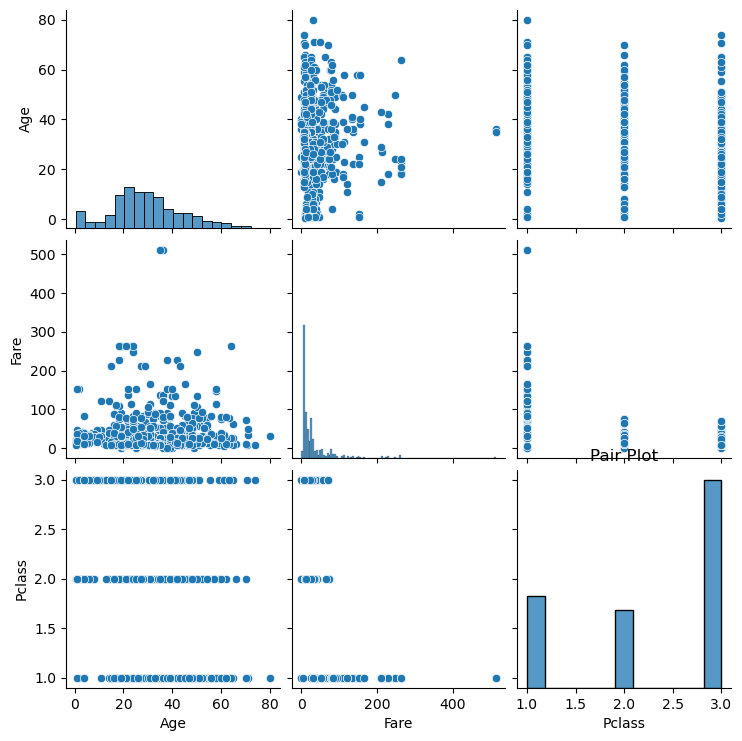

In [97]:
# Pair Plots
plt.figure(figsize=(10,6))
sns.pairplot(train_df[['Age', 'Fare', 'Pclass']])
plt.title('Pair Plot')
plt.show()

In [98]:
# Handle missing values in 'Age' both columns
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

In [99]:
# Handle missing values in 'Fare' column test_df
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

In [100]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode())
train_df.dropna(inplace=True)
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [102]:
# Drop 'Cabin' column due to high number of missing values
train_df.drop('Cabin', axis=1,inplace=True)
test_df.drop('Cabin', axis=1,inplace=True)

In [103]:
# Drop 'Cabin' column due to high number of missing values
#train_df.drop('Name', axis=1,inplace=True)
#test_df.drop('Name', axis=1,inplace=True)
      # or
test_df.drop(['Name','Ticket','PassengerId'], axis=1 ,inplace = True)
#WE CAN DROP MULTI COLUMNS AT A TIME by using this moethod

In [104]:
train_df.drop(['Name','Ticket','PassengerId'], axis=1,inplace = True)

In [105]:
print(train_df['Sex'].unique())
print(test_df['Sex'].unique())

['female' 'male']
['male' 'female']


In [106]:
# Convert 'Sex' column to numeric
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [107]:
print(train_df['Embarked'].unique())
print(test_df['Embarked'].unique())

['C' 'S' 'Q']
['Q' 'S' 'C']


In [108]:
# Convert 'Embarked' column to numeric
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [109]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,1,38.0,1,0,71.2833,1
3,1,1,1,35.0,1,0,53.1000,0
6,0,1,0,54.0,0,0,51.8625,0
10,1,3,1,4.0,1,1,16.7000,0
11,1,1,1,58.0,0,0,26.5500,0


In [110]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [111]:
corr_train = train_df[train_df.columns].corr()
corr_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.030513,0.545297,-0.228967,0.138202,0.042456,0.128261,0.098215
Pclass,-0.030513,1.000000,0.060014,-0.287238,-0.086972,0.056288,-0.311740,-0.093935
Sex,0.545297,0.060014,1.000000,-0.164454,0.152552,0.110574,0.137185,0.090463
Age,-0.228967,-0.287238,-0.164454,1.000000,-0.136181,-0.240958,-0.072798,0.076406
SibSp,0.138202,-0.086972,0.152552,-0.136181,1.000000,0.262348,0.291777,0.025391
Parch,0.042456,0.056288,0.110574,-0.240958,0.262348,1.000000,0.384970,-0.089424
Fare,0.128261,-0.311740,0.137185,-0.072798,0.291777,0.384970,1.000000,0.195429
Embarked,0.098215,-0.093935,0.090463,0.076406,0.025391,-0.089424,0.195429,1.000000


### VISUAL CORRELATION PLOT OF ABOVE DATA from train_df

<Axes: >

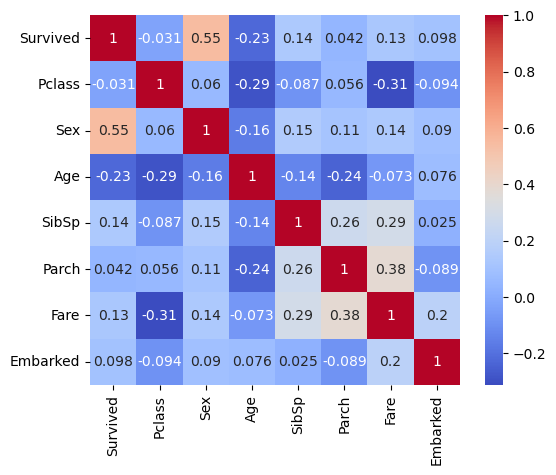

In [113]:
sns.heatmap(corr_train,annot = True ,cmap = 'coolwarm',square = True)

In [118]:
corr_test =test_df[test_df.columns].corr()
corr_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,-0.108615,-0.467853,0.001087,0.018721,-0.577313,0.031096
Sex,-0.108615,1.000000,0.008035,0.099943,0.159120,0.192036,0.126779
Age,-0.467853,0.008035,1.000000,-0.071197,-0.043731,0.342357,0.063951
SibSp,0.001087,0.099943,-0.071197,1.000000,0.306895,0.171912,-0.100603
Parch,0.018721,0.159120,-0.043731,0.306895,1.000000,0.230325,-0.125164
Fare,-0.577313,0.192036,0.342357,0.171912,0.230325,1.000000,0.054165
Embarked,0.031096,0.126779,0.063951,-0.100603,-0.125164,0.054165,1.000000


### VISUAL CORRELATION PLOT OF ABOVE DATA from test_df

<Axes: >

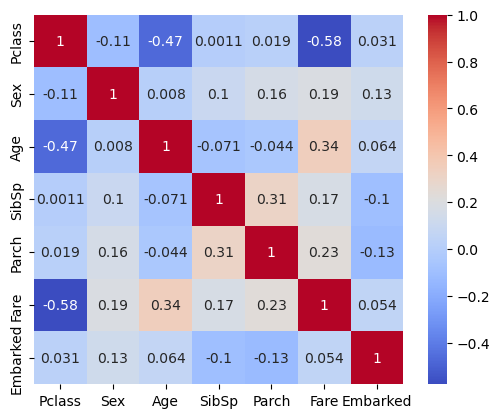

In [130]:
sns.heatmap(corr_test,annot = True ,cmap = 'coolwarm',square = True)

In [131]:
# I DONT WANT TO REMOVE OUTLIERS FOR DATA 
# BEACUSE WE HAVE LABELED 0 AND 1 FOR CATEGORIE COLUMNS
# I DONT WANT TO REMOVE OUTLIERS
# I WILL NOT USE STANDARD SCALAR FOR LABELED DATA

### SPLITTING DATA

In [135]:
import sklearn.model_selection as ms
import sklearn.metrics as skm
import sklearn.linear_model as lm

In [136]:
# Define the features (X) for the training data
x = train_df.drop(['Survived'], axis=1)

In [137]:
# Define the target variable (y) for the training data
y = train_df['Survived']

In [140]:
for random_state in range(1, 100):
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.4, random_state=random_state)

In [141]:
# Define the features (z) for the testing data
z_test = test_df

In [142]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(121, 7)
(81, 7)
(121,)
(81,)


In [144]:
y_train.value_counts()

Survived
1    73
0    48
Name: count, dtype: int64

# IMBALANCE DATA CLASSES

In [151]:
import imblearn.over_sampling as osp

In [153]:
smote = osp.SMOTE()

In [154]:
x_train_s,y_train_s = smote.fit_resample(x_train,y_train)
x_train.shape

(121, 7)

In [155]:
y_train_s.value_counts()

Survived
0    73
1    73
Name: count, dtype: int64

# MODEL BUILDING

In [161]:
model = lm.LogisticRegression(max_iter=1000)

In [162]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [164]:
y_pred = model.predict(x_test)

In [167]:
auc_s = skm.accuracy_score

In [169]:
auc_s(y_test,y_pred)

0.7901234567901234

In [171]:
a = skm.confusion_matrix
skm.classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [173]:
conf = a(y_test,y_pred)

Text(0.5, 1.0, 'CONFUSION_METRIX')

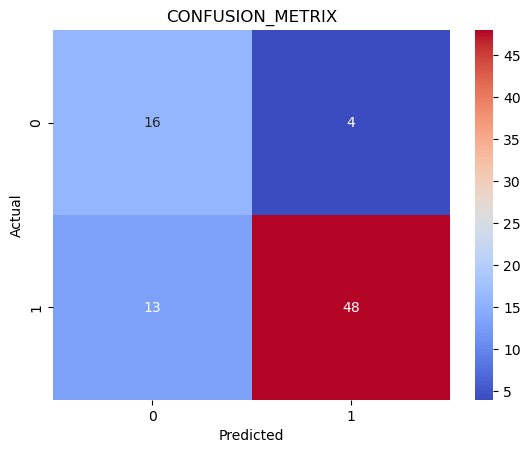

In [175]:
sns.heatmap(conf,annot = True,cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CONFUSION_METRIX')

In [176]:
model.predict_proba(x_test)

array([[0.19452343, 0.80547657],
       [0.18190547, 0.81809453],
       [0.66525256, 0.33474744],
       [0.70669353, 0.29330647],
       [0.74997809, 0.25002191],
       [0.56148766, 0.43851234],
       [0.45129072, 0.54870928],
       [0.06283901, 0.93716099],
       [0.48142252, 0.51857748],
       [0.51603864, 0.48396136],
       [0.78079631, 0.21920369],
       [0.07786604, 0.92213396],
       [0.54824243, 0.45175757],
       [0.60412604, 0.39587396],
       [0.18307809, 0.81692191],
       [0.7932507 , 0.2067493 ],
       [0.26153962, 0.73846038],
       [0.46294308, 0.53705692],
       [0.1140563 , 0.8859437 ],
       [0.09529508, 0.90470492],
       [0.15211723, 0.84788277],
       [0.68389061, 0.31610939],
       [0.54285099, 0.45714901],
       [0.10573677, 0.89426323],
       [0.78793447, 0.21206553],
       [0.06092951, 0.93907049],
       [0.17945676, 0.82054324],
       [0.44181193, 0.55818807],
       [0.12643244, 0.87356756],
       [0.08084906, 0.91915094],
       [0.

In [179]:
y_pred1 = [1 if x[1]> 0.5 else 0 for x in model.predict_proba(x_test)]

In [181]:
auc_s(y_test,y_pred1)

0.7901234567901234

In [183]:
pred_proba = model.predict_proba(x_test)

In [185]:
sigmoid = pred_proba[:,1]
sigmoid

array([0.80547657, 0.81809453, 0.33474744, 0.29330647, 0.25002191,
       0.43851234, 0.54870928, 0.93716099, 0.51857748, 0.48396136,
       0.21920369, 0.92213396, 0.45175757, 0.39587396, 0.81692191,
       0.2067493 , 0.73846038, 0.53705692, 0.8859437 , 0.90470492,
       0.84788277, 0.31610939, 0.45714901, 0.89426323, 0.21206553,
       0.93907049, 0.82054324, 0.55818807, 0.87356756, 0.91915094,
       0.4047367 , 0.55952091, 0.8704542 , 0.64138625, 0.46513848,
       0.34100357, 0.71936166, 0.89763597, 0.11312608, 0.47013161,
       0.88550317, 0.83211837, 0.29276633, 0.31498444, 0.38540559,
       0.60411826, 0.62415991, 0.93466971, 0.78657852, 0.703326  ,
       0.29363412, 0.94053514, 0.93882672, 0.77990779, 0.89478336,
       0.47042726, 0.9369723 , 0.18956001, 0.80612551, 0.09715467,
       0.2795883 , 0.4926019 , 0.85858165, 0.8745128 , 0.88226152,
       0.95084627, 0.58023037, 0.71777707, 0.75153917, 0.29143381,
       0.82217783, 0.93941649, 0.89859611, 0.50771506, 0.48810

In [187]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score, roc_curve, classification_report

In [189]:
roc_auc_score(y_test,sigmoid)

0.8508196721311475

In [191]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.80      0.65        20
           1       0.92      0.79      0.85        61

    accuracy                           0.79        81
   macro avg       0.74      0.79      0.75        81
weighted avg       0.83      0.79      0.80        81



In [193]:
auc_score = roc_auc_score(y_test,sigmoid)

In [195]:
fpr,tpr,thr = roc_curve(y_test,sigmoid)

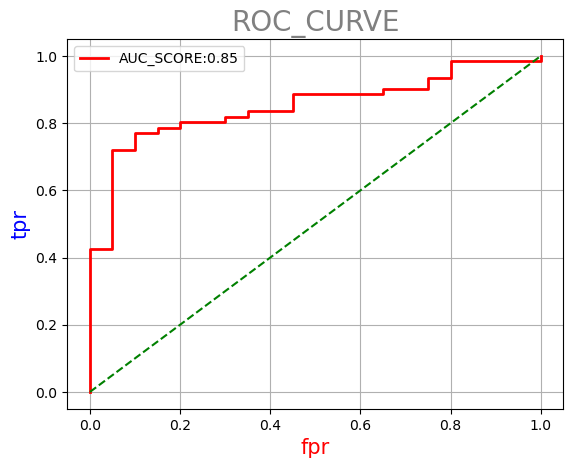

In [197]:
plt.plot(fpr,tpr,color='r',linewidth=2,label=f'AUC_SCORE:{auc_score:.2f}')
plt.plot([0,1],linestyle = '--',color ='g',)
plt.grid()
plt.xlabel('fpr',color = 'r',size=15)
plt.ylabel('tpr',color = 'b',size=15)
plt.title('ROC_CURVE',color = 'gray',size = 20)
plt.legend()

In [198]:
# Improving model with hyperparameter

In [201]:
import warnings
warnings.filterwarnings('ignore')

In [203]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [205]:
# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [207]:
# Define the hyperparameter grid
param_grid = { 'C': [0.1, 1, 10],'penalty': ['l1', 'l2']}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [209]:
# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [211]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict_proba(x_test_scaled)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print(f'Best Model ROC-AUC Score: {auc:.4f}')

Best Model ROC-AUC Score: 0.8508


In [213]:
import pickle

In [215]:
file = 'log_deploy.pkl'

In [217]:
pickle.dump(model,open(file,'wb'))